# ERP calculation using mne
### import


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as scio
import os
import mne


## Load Task file

In [4]:
list_files_path_name = pd.read_csv('../task_track_files/task_track_file_matlab.csv',usecols=['local_file_path','raw_data_file_name','Group_file_type','preprocessed_one','ERP_npy_file_with_normalization_and_baseline_correction','ERP_nobaseline_npy_file'])
num_task_file = list_files_path_name.shape[0]
list_files_path_name

,local_file_path,raw_data_file_name,preprocessed_one,ERP_npy_file_with_normalization_and_baseline_correction,ERP_nobaseline_npy_file,Group_file_type
0,sub-001\ses-01\eeg\,sub-001_ses-01_task-Rest_eeg.set,pre_sub-001_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-001_ses-01_...,ERP_nb_correct_sub-001_ses-01_task-Rest_eeg.npy,PD_ON
1,sub-001\ses-02\eeg\,sub-001_ses-02_task-Rest_eeg.set,pre_sub-001_ses-02_task-Rest_eeg.set,ERP_base_correct_normalization_sub-001_ses-02_...,ERP_nb_correct_sub-001_ses-02_task-Rest_eeg.npy,PD_OFF
2,sub-002\ses-01\eeg\,sub-002_ses-01_task-Rest_eeg.set,pre_sub-002_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-002_ses-01_...,ERP_nb_correct_sub-002_ses-01_task-Rest_eeg.npy,PD_ON
3,sub-002\ses-02\eeg\,sub-002_ses-02_task-Rest_eeg.set,pre_sub-002_ses-02_task-Rest_eeg.set,ERP_base_correct_normalization_sub-002_ses-02_...,ERP_nb_correct_sub-002_ses-02_task-Rest_eeg.npy,PD_OFF
4,sub-003\ses-01\eeg\,sub-003_ses-01_task-Rest_eeg.set,pre_sub-003_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-003_ses-01_...,ERP_nb_correct_sub-003_ses-01_task-Rest_eeg.npy,CTL
...,...,...,...,...,...,...
70,sub-046\ses-01\eeg\,sub-046_ses-01_task-Rest_eeg.set,pre_sub-046_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-046_ses-01_...,ERP_nb_correct_sub-046_ses-01_task-Rest_eeg.npy,CTL
71,sub-047\ses-01\eeg\,sub-047_ses-01_task-Rest_eeg.set,pre_sub-047_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-047_ses-01_...,ERP_nb_correct_sub-047_ses-01_task-Rest_eeg.npy,CTL
72,sub-048\ses-01\eeg\,sub-048_ses-01_task-Rest_eeg.set,pre_sub-048_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-048_ses-01_...,ERP_nb_correct_sub-048_ses-01_task-Rest_eeg.npy,CTL
73,sub-049\ses-01\eeg\,sub-049_ses-01_task-Rest_eeg.set,pre_sub-049_ses-01_task-Rest_eeg.set,ERP_base_correct_normalization_sub-049_ses-01_...,ERP_nb_correct_sub-049_ses-01_task-Rest_eeg.npy,CTL


## Load EEG signals and ERP calculation
### Baseline Correction applied


In [2]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}
ERP_array = np.zeros([3,63,601],dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['ERP_npy_file'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t  = events[events[:,2]==5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200':5}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0,:,:] = np.transpose(ERP['S200'].to_numpy())
        
        t  = events[events[:,2]==6]
        t2 = {'S201':6}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0) 
        ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
        del ERP['S201']['time']
        ERP_array[1,:,:] = np.transpose(ERP['S201'].to_numpy())

        t  = events[events[:,2]==7]
        t2 = {'S202':7}               
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=-0.2, tmax=1, baseline=(-0.2,0),preload=True, verbose=0)  
        ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
        del ERP['S202']['time']
        ERP_array[2,:,:] = np.transpose(ERP['S202'].to_numpy())
        
        stimulus_number = 1
        Channel_num = 1

        plt.plot(ERP_array[stimulus_number,Channel_num,:])

        np.save(Path_to_save_file,ERP_array)



                                                 
        
            
# events[:,2]

    

NameError: name 'mne' is not defined

### Applying normalization

In [26]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}
ERP_array = np.zeros([3,63,601],dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['ERP_npy_file_with_normalization_and_baseline_correction'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)
        
        std_per_ch = np.std(EEG._data,axis=1)
        mean_per_ch = np.mean(EEG._data,axis=1)
        mean_per_ch = np.expand_dims(mean_per_ch,axis=1)
        std_per_ch = np.expand_dims(std_per_ch,axis=1)
        temp1 = (EEG._data - mean_per_ch)
        temp2 = temp1/std_per_ch
        EEG._data = temp2*1e-6

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t  = events[events[:,2]==5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200':5}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0,:,:] = np.transpose(ERP['S200'].to_numpy())
        
        t  = events[events[:,2]==6]
        t2 = {'S201':6}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0) 
        ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
        del ERP['S201']['time']
        ERP_array[1,:,:] = np.transpose(ERP['S201'].to_numpy())

        t  = events[events[:,2]==7]
        t2 = {'S202':7}               
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=-0.2, tmax=1, baseline=(-0.2,0),preload=True, verbose=0)  
        ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
        del ERP['S202']['time']
        ERP_array[2,:,:] = np.transpose(ERP['S202'].to_numpy())
        
        stimulus_number = 1
        Channel_num = 1

        plt.plot(ERP_array[stimulus_number,Channel_num,:])

        np.save(Path_to_save_file,ERP_array)



                                                 
        
            
# events[:,2]

    

KeyboardInterrupt: 

### Check with kiani codes

In [19]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}
ERP_array = np.zeros([3,63,601],dtype=np.float64)
for i in np.arange(1):
    Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['ERP_npy_file_with_normalization_and_baseline_correction'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)

        std_per_ch = np.std(EEG._data,axis=1)
        mean_per_ch = np.mean(EEG._data,axis=1)
        mean_per_ch = np.expand_dims(mean_per_ch,axis=1)
        std_per_ch = np.expand_dims(std_per_ch,axis=1)
        temp1 = (EEG._data - mean_per_ch)
        temp2 = temp1/std_per_ch
        EEG._data = temp2*1e-6

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t  = events[events[:,2]==5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200':5}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0,:,:] = np.transpose(ERP['S200'].to_numpy())
        
        t  = events[events[:,2]==6]
        t2 = {'S201':6}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0) 
        ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
        del ERP['S201']['time']
        ERP_array[1,:,:] = np.transpose(ERP['S201'].to_numpy())

        t  = events[events[:,2]==7]
        t2 = {'S202':7}               
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=-0.2, tmax=1, baseline=(-0.2,0),preload=True, verbose=0)  
        ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
        del ERP['S202']['time']
        ERP_array[2,:,:] = np.transpose(ERP['S202'].to_numpy())
        





                                                 
        
            
# events[:,2]

    

Reading D:\Mastersharif\MasterProject\data\parkinsons-oddball\sub-001\ses-01\eeg\pre_sub-001_ses-01_task-Rest_eeg.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...


C:\Users\Mohammad\AppData\Local\Temp/ipykernel_14632/3500161575.py:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)


### Check with kiani code

(63, 601)


0.005302335323351215

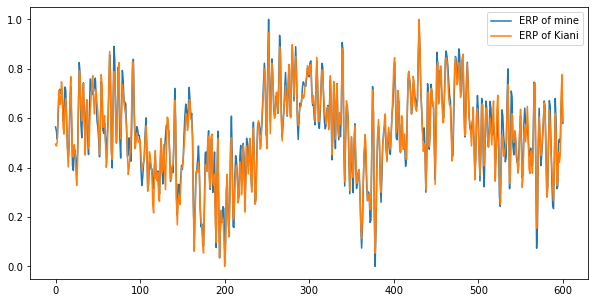

In [24]:
Stimuli = ['S200','S201','S202']
Trials = np.load('..\data\sub-001_ses-01_task-Rest_epochs.npz')
# ERP = np.load('..\data\epochs.npz')
# ERP = ERP['epochs']
# print(ERP.shape)
Group_num = 0
Subject_num = 0
Stimulus_num = 2
Channel_num = 60
plt.figure(figsize=(10,5))
ERP = np.mean(Trials[Stimuli[Stimulus_num]],axis=0)
print(ERP.shape)


temp = ERP_array[Stimulus_num,Channel_num,:]



vmax = np.max(temp)
vmin = np.min(temp)
temp_norm = (temp-vmin)/(vmax-vmin)
plt.plot(temp_norm)
# plt.plot(temp)

temp1 = ERP[Channel_num,:]
# temp1 = ERP[0,Subject_num,Stimulus_num,0,Channel_num,:]
vmax = np.max(temp1)
vmin = np.min(temp1)
temp1_norm = (temp1-vmin)/(vmax-vmin)
plt.plot(temp1_norm)
# plt.plot(temp1)

plt.legend(['ERP of mine','ERP of Kiani'])


np.linalg.norm(temp1_norm-temp_norm)/np.linalg.norm(temp1_norm)/np.linalg.norm(temp_norm)

## Calculate Digit_sequences

In [18]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
Path_to_digit_sequences = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball\EEG_feature\digit_sequences'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}
ERP_array = np.zeros([3,63,601],dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
    Temp = list_files_path_name['raw_data_file_name'][i][0:-4]
    Path_to_save_dir = os.path.join(Path_to_digit_sequences,Temp)
    Path_to_save_file = os.path.join(Path_to_save_dir,'digit_sequences.npy')
    if  os.path.isfile(Path_to_save_file):
        if not os.path.isdir(Path_to_save_dir):
            os.mkdir(Path_to_save_dir)
        EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        events = mne.pick_events(events,include=[event_dict['S200'],event_dict['S201'],event_dict['S202']])
        digit_sequences = events[:,2]-4
 

        np.save(Path_to_save_file,digit_sequences)



                                                 
        
            
# events[:,2]

    

Reading D:\Mastersharif\MasterProject\data\parkinsons-oddball\sub-001\ses-01\eeg\pre_sub-001_ses-01_task-Rest_eeg.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...


C:\Users\Mohammad\AppData\Local\Temp/ipykernel_10172/2834144455.py:15: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)


KeyboardInterrupt: 

### No baseline Correction


In [ ]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
# montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}
ERP_array = np.zeros([3,63,601],dtype=np.float64)
for i in np.arange(num_task_file):
    Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
    Path_to_save_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['ERP_nobaseline_npy_file'][i])
    if not os.path.isfile(Path_to_save_file):
        EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)

        events, event_dict = mne.events_from_annotations(EEG, verbose=0)
        t  = events[events[:,2]==5]
        # t1 = mne.pick_events(events,include=[5])
        t2 = {'S200':5}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450,baseline = None,preload=True, verbose=0)
        ERP['S200'] = pochs_1['S200'].average().to_data_frame()
        del ERP['S200']['time']
        ERP_array[0,:,:] = np.transpose(ERP['S200'].to_numpy())
        
        t  = events[events[:,2]==6]
        t2 = {'S201':6}
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=0.250, tmax=1.450,baseline = None,preload=True, verbose=0) 
        ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
        del ERP['S201']['time']
        ERP_array[1,:,:] = np.transpose(ERP['S201'].to_numpy())

        t  = events[events[:,2]==7]
        t2 = {'S202':7}               
        pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                        tmin=-0.2, tmax=1,baseline = None,preload=True, verbose=0)  
        ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
        del ERP['S202']['time']
        ERP_array[2,:,:] = np.transpose(ERP['S202'].to_numpy())


        np.save(Path_to_save_file,ERP_array)



                                                 
        
            
# events[:,2]

    

## Load and plot ERP

### Check and compare the result with matlab calculation



In [ ]:
Channel_num = 62
subject_num = 34


Path_to_save_file = os.path.join(Path,list_files_path_name['local_file_path'][subject_num],list_files_path_name['ERP_npy_file'][subject_num])
test_ERP_array = np.load(Path_to_save_file)

test_dict = scio.loadmat('..\matlab\\test_ERP.mat')
ERP_matlab = test_dict['test_ERP']


plt.plot(test_ERP_array[0,Channel_num,:])




plt.plot(ERP_matlab[0,:])
plt.legend(["ERP py", "ERP mat"])
plt.show()

